In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Introducing the iris dataset

![Iris](images/03_iris.png)

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width

In [2]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
data.shape

(150, 5)

In [5]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
data.columns = colnames

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [10]:
data['Species'] = data['species'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} ).astype(int)

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
data.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [93]:
X = data.loc[:,'sepal_length':'petal_width']

In [94]:
y = data.Species

# A few Plots

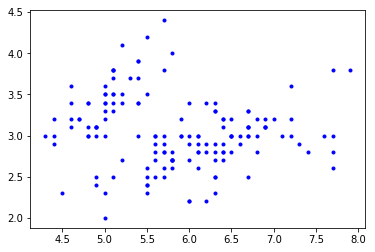

In [15]:
plt.plot(data.sepal_length, data.sepal_width, 'b.')

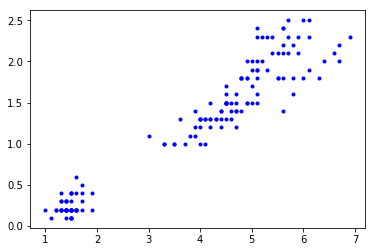

In [16]:
plt.plot(data.petal_length, data.petal_width, 'b.')

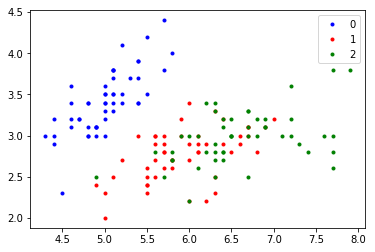

In [52]:
plt.plot(data.loc[data.Species==0,:].sepal_length, 
         data.loc[data.Species==0,:].sepal_width, 
         'b.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_length, 
         data.loc[data.Species==1,:].sepal_width, 
         'r.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_length, 
         data.loc[data.Species==2,:].sepal_width, 
         'g.',
         label='2')
plt.legend()
plt.show()

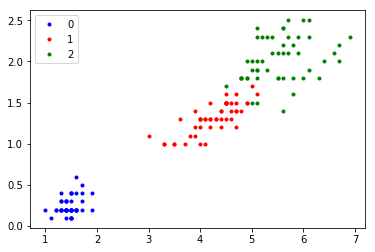

In [53]:
plt.plot(data.loc[data.Species==0,:].petal_length, 
         data.loc[data.Species==0,:].petal_width, 
         'b.',
         label='0')

plt.plot(data.loc[data.Species==1,:].petal_length, 
         data.loc[data.Species==1,:].petal_width, 
         'r.',
         label='1')

plt.plot(data.loc[data.Species==2,:].petal_length, 
         data.loc[data.Species==2,:].petal_width, 
         'g.',
         label='2')
plt.legend()
plt.show()

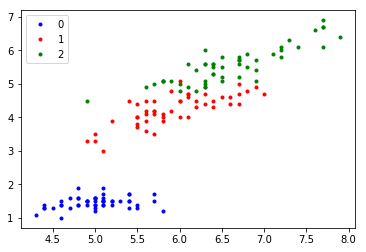

In [54]:
plt.plot(data.loc[data.Species==0,:].sepal_length, 
         data.loc[data.Species==0,:].petal_length, 
         'b.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_length, 
         data.loc[data.Species==1,:].petal_length, 
         'r.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_length, 
         data.loc[data.Species==2,:].petal_length, 
         'g.',
         label='2')
plt.legend()
plt.show()

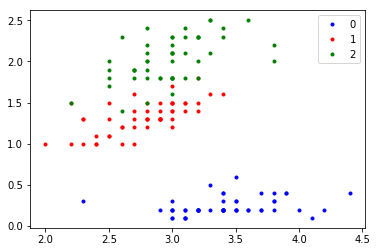

In [55]:
plt.plot(data.loc[data.Species==0,:].sepal_width, 
         data.loc[data.Species==0,:].petal_width, 
         'b.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_width, 
         data.loc[data.Species==1,:].petal_width, 
         'r.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_width, 
         data.loc[data.Species==2,:].petal_width, 
         'g.',
         label='2')
plt.legend()
plt.show()

Clearly there are relationships here!

## Nearest Neighbors Classification

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier(n_neighbors=1)

In [96]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [97]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# predict the species based on a measurement

In [98]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [99]:
knn.predict([[5, 4, 1.3, .2]])

array([0])

In [100]:
knn.predict([[6, 4, 5, 1]])

array([1])

In [101]:
knn.classes_

array([0, 1, 2])

In [102]:
# Can predict multiple observations at once
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

array([2, 1, 1])

### using a different number for k neighbors

In [103]:
# using a different number for k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [104]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

array([1, 1, 1])

### Changing k to 5 did a terrible job! All were predicted to be the same species. 

# Using a different classification model. 
# Logistic Regression

In [107]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

array([2, 0, 1])

# Linear SVC

In [108]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [109]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [111]:
clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

array([2, 0, 1])

In [112]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

print(clf.coef_)

print(clf.intercept_)

print(clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]]))

#print(clf.predict([[0, 0, 0, 0]]))

[[ 0.18424476  0.45122307 -0.80793741 -0.45072718]
 [ 0.05264136 -0.89310759  0.4034698  -0.9358626 ]
 [-0.85070046 -0.98679981  1.38097883  1.86523791]]
[ 0.10955345  1.66792357 -1.70970407]
[2 0 1]


In [113]:
print(clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]]))



[2 0 1]
